# World Happiness Report Project

Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?


The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
    
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

Dataset Link-


https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(158, 12)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This gives the brief about the dataset which includes indexing type, columns,no null values and memory usage.

In [10]:
#All columns has the same number of data points

extra = df[df.duplicated()]
extra.shape

(0, 12)

In [11]:
df.duplicated().sum()

0

In [12]:
print ("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 0


In [13]:
print ("Total Duplicate Rows are", df.duplicated().sum)

Total Duplicate Rows are <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool>


In [14]:
df.shape

(158, 12)

In [15]:
print("There are {:,} rows ".format(df.shape[0]) + "and {} columns in our data".format(df.shape[1]))

There are 158 rows and 12 columns in our data


# Set the Country column as Indexing

# Check Null value / Missing value

In [16]:
#checking the null values- Missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

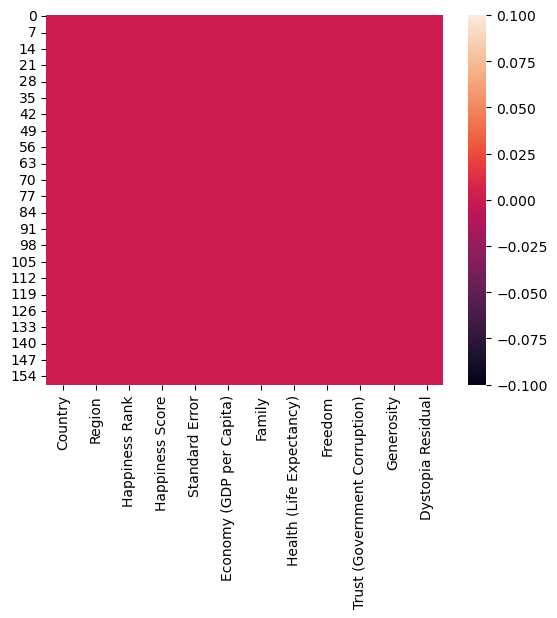

In [17]:
sns.heatmap(df.isnull())

we can clearly visualize that there is no missing data present.

In [18]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [19]:
# Checking the values counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n") 

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

These are the values counts of all columns and we dont find any blank in column

# Describing the Data

In [20]:
# Statistical summary of numerical
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in Happiness Score,Standard Error ,which means the data is skewed to right in these

3)  The means value is less than the median(50%) in Economy (GDP per Capita),Family,Health (Life Expectancy),which means the data is skewed to left in these

4) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

5) We can also notice the standard deviation, min,25% percantile values from this describe method

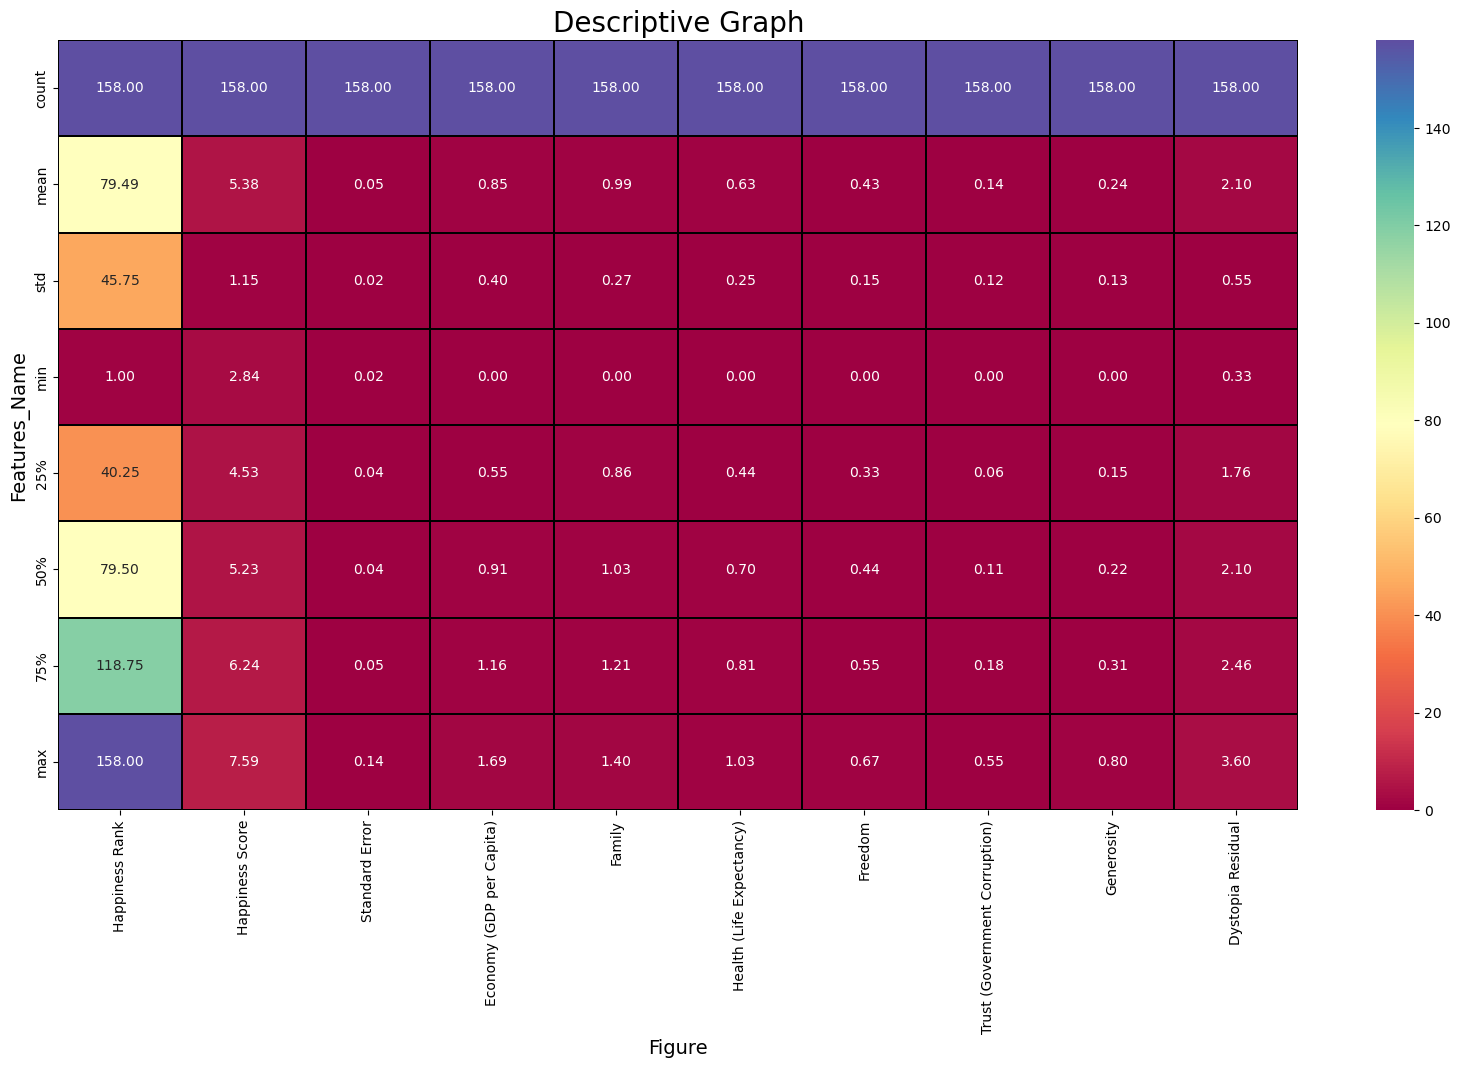

In [21]:
plt.figure(figsize =(20,10))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

In [22]:
df.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [23]:
df.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


# Indexing and grouping

Indexing and grouping
Use the column 'Region' to create a separate DataFrame containing the data points from each of the 10 regions: 


1.Compute the mean happiness score for each region and rank the regions from most happy to least happy.

2.Compute the number of countries in each region that have a happiness score above 6.0.

3.Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [24]:
# Before separate the data, I will check that we just have 10 different regions. 

df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [25]:
region_counts = df['Region'].value_counts()
print(region_counts)


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [26]:
# Look at which country has Western Europe as Region. 

df[df['Region'] == 'Western Europe'] .head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [27]:
df_Region = df.groupby('Region')

In [28]:
df_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


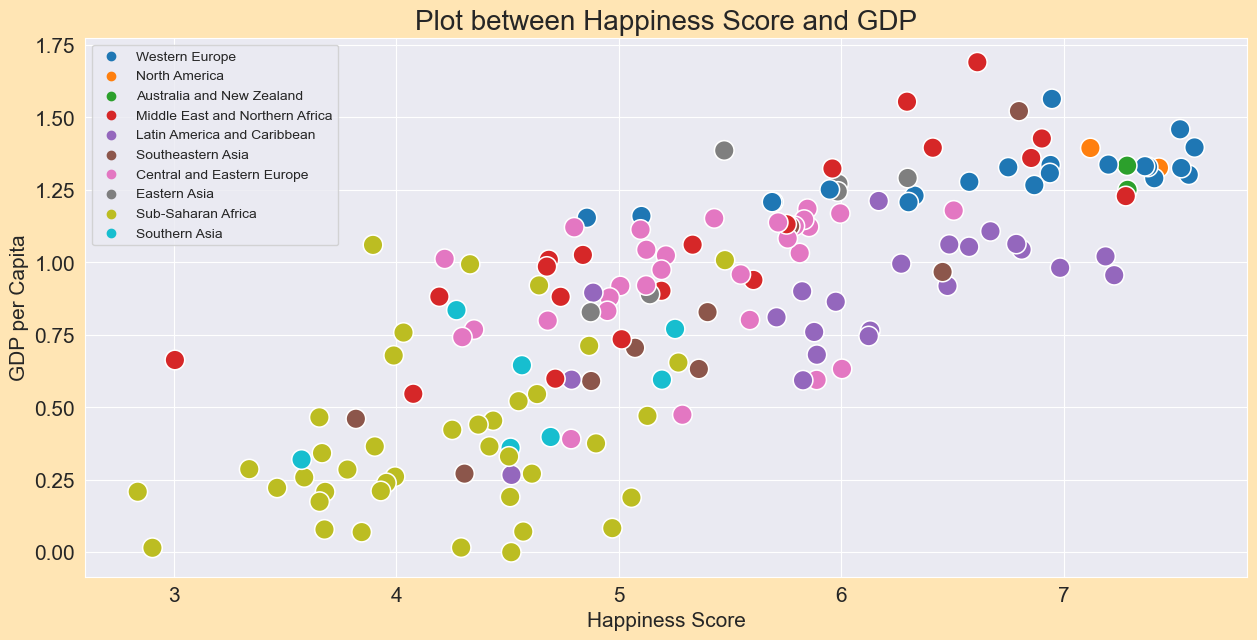

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

plt.title('Plot between Happiness Score and GDP', fontsize=20)

# Use single quotes for column names with spaces
sns.scatterplot(x=df['Happiness Score'], y=df['Economy (GDP per Capita)'], hue=df['Region'], s=200)
plt.legend(loc='upper left', fontsize=10)

plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

plt.show()


In [29]:
GDP_Region = df.groupby('Region')['Economy (GDP per Capita)'].sum()
GDP_Region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set_style('darkgrid')

# Update font size and figure size
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)

# Update figure facecolor
plt.rcParams['figure.facecolor'] = '#FFE5B4'


Text(0, 0.5, '')

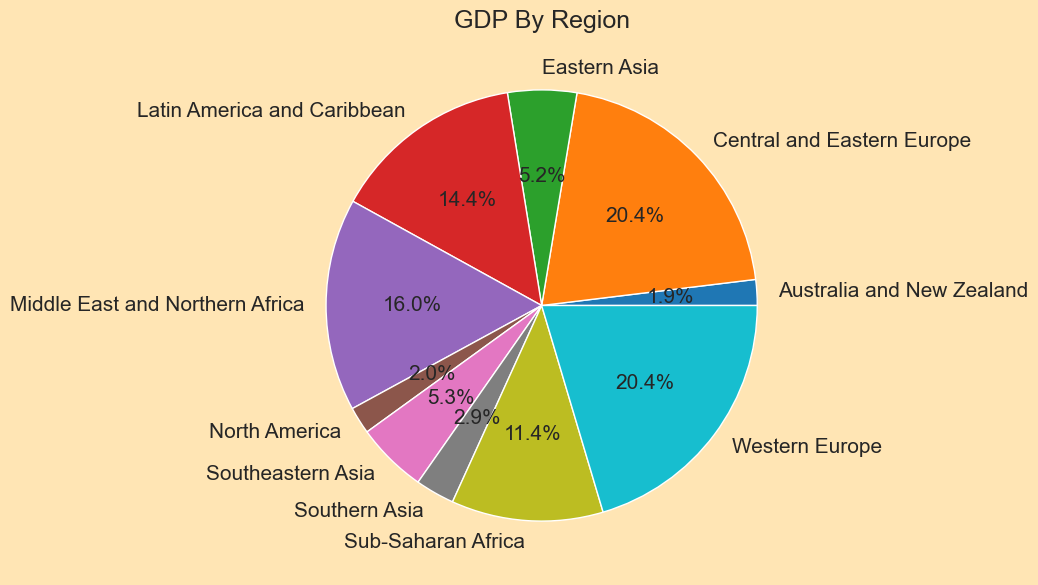

In [31]:
GDP_Region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP By Region')
plt. ylabel('')

Total GDP of all regions

# Total number of countries in each region

In [38]:
total_country=df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


# Correlation Map

In [39]:
# Checking the correlation between feature and the target
cor = df.corr()
cor 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


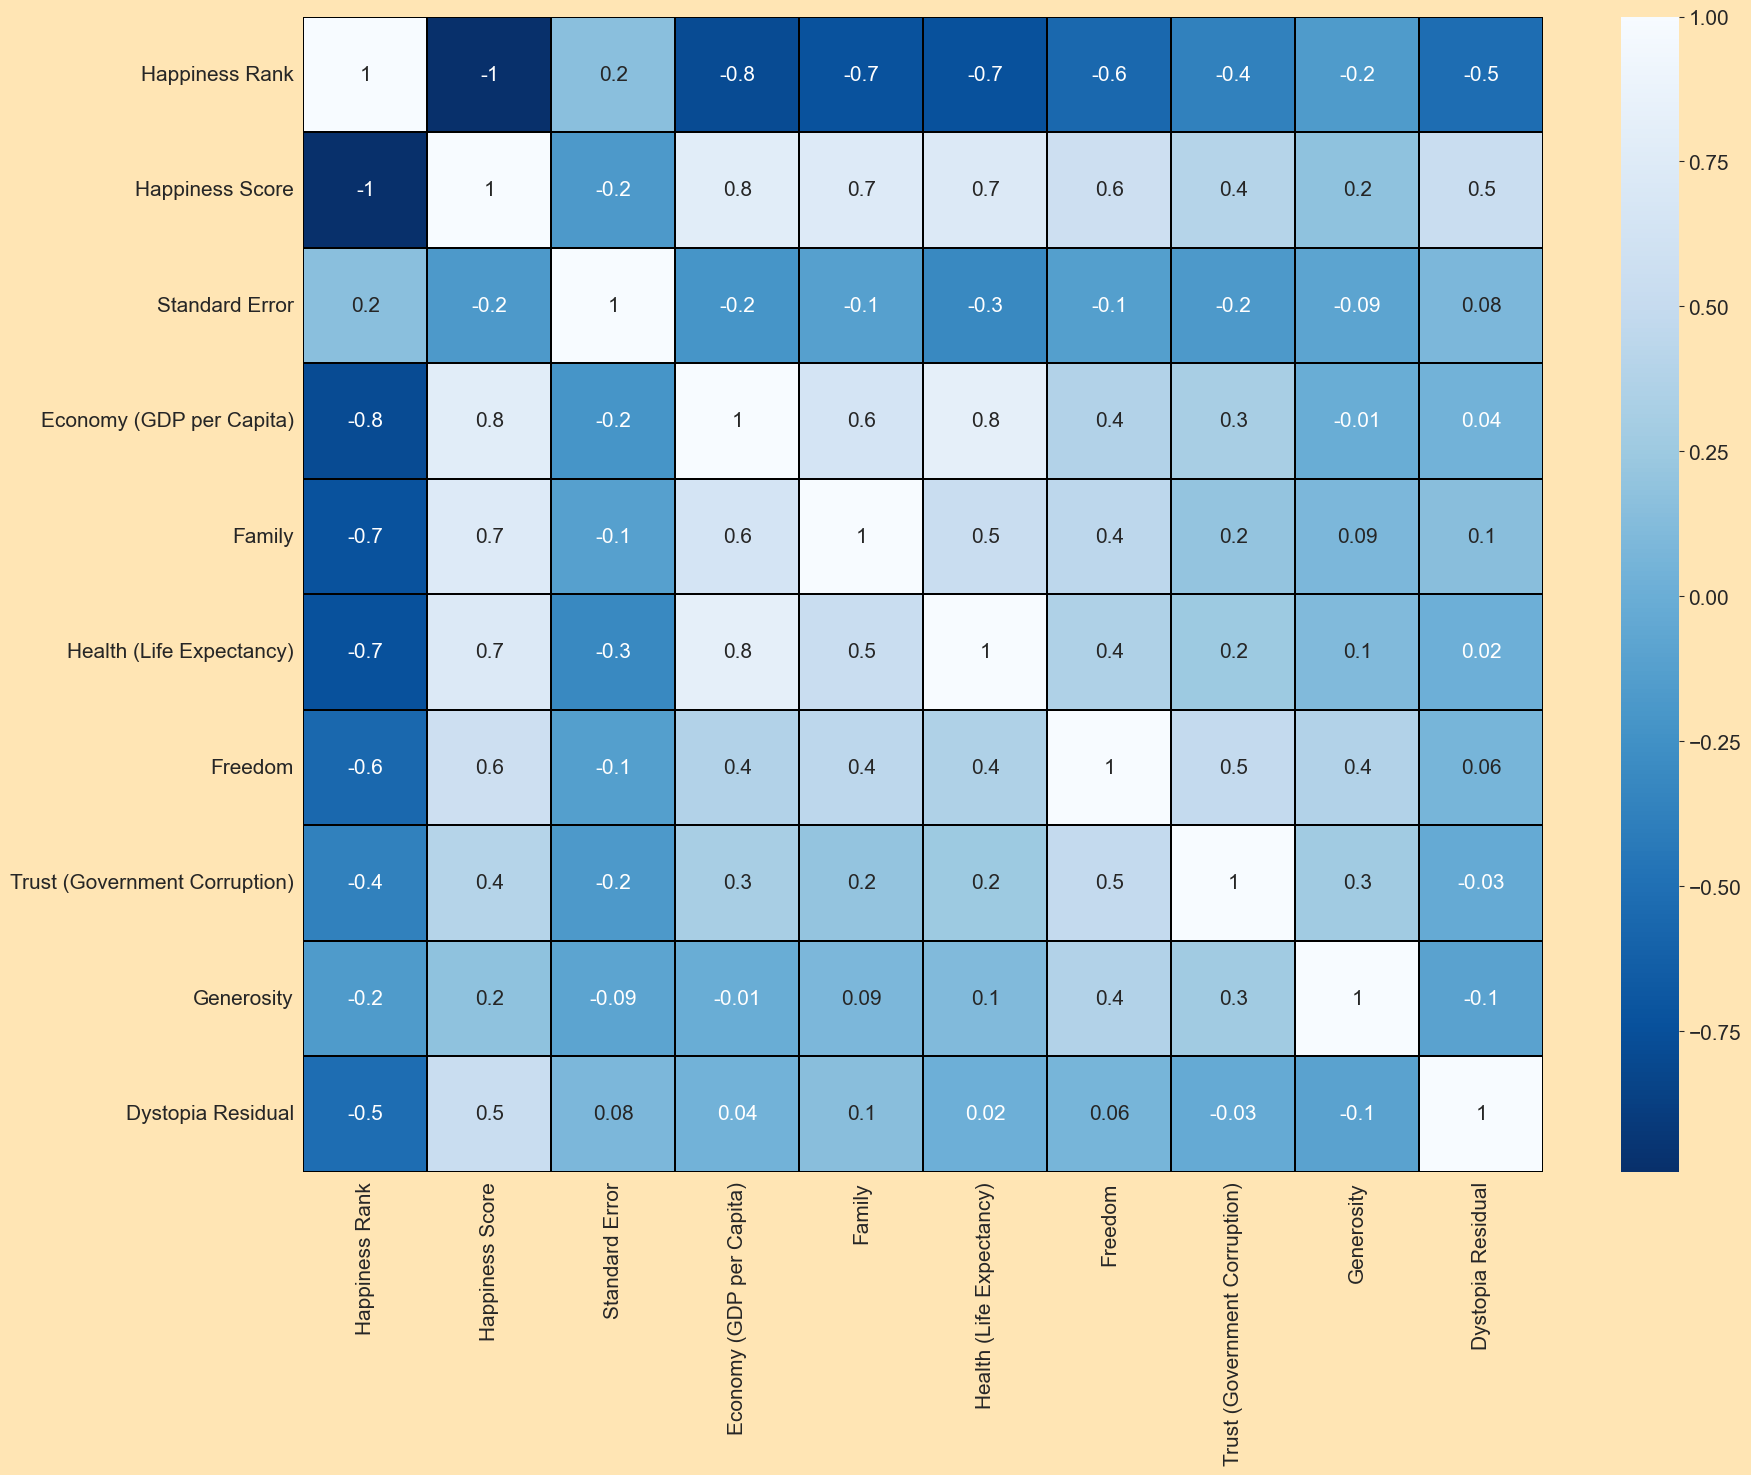

In [40]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

<AxesSubplot:>

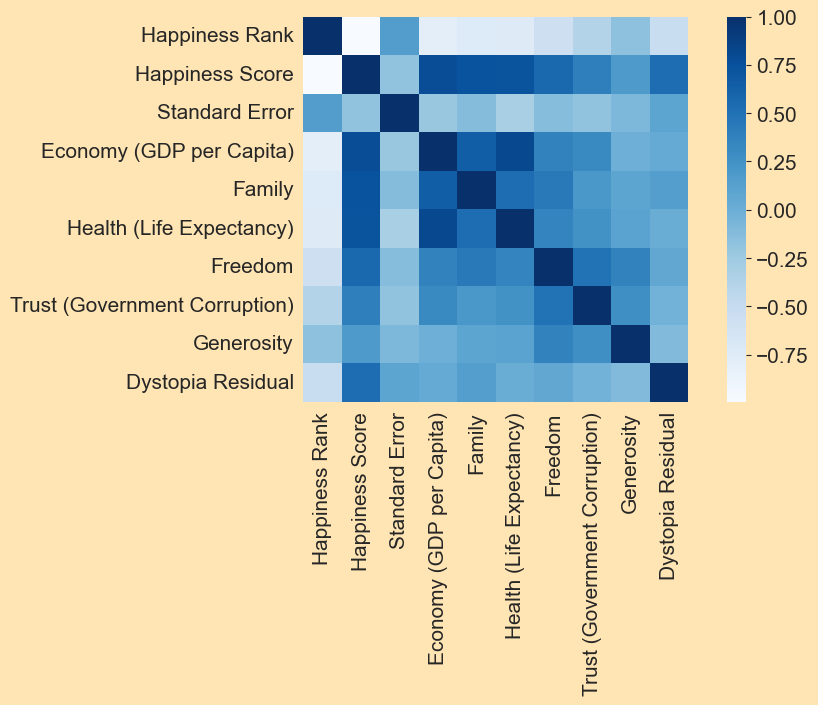

In [45]:
cor = df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like (cor, dtype= np.bool),cmap= "Blues",square = True , ax=ax)

In [41]:
df_mean = df.groupby(['Region'])[['Happiness Score']].mean()

df_mean.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


# Average corruption in regions

In [48]:
# average corruption in regions
corruption = df.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption .sort_values(by = 'Trust (Government Corruption)', ascending = False)


,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
North America,0.244235
Western Europe,0.231463
Middle East and Northern Africa,0.181702
Southeastern Asia,0.151276
Eastern Asia,0.127695
Sub-Saharan Africa,0.123878
Latin America and Caribbean,0.117172
Southern Asia,0.102536


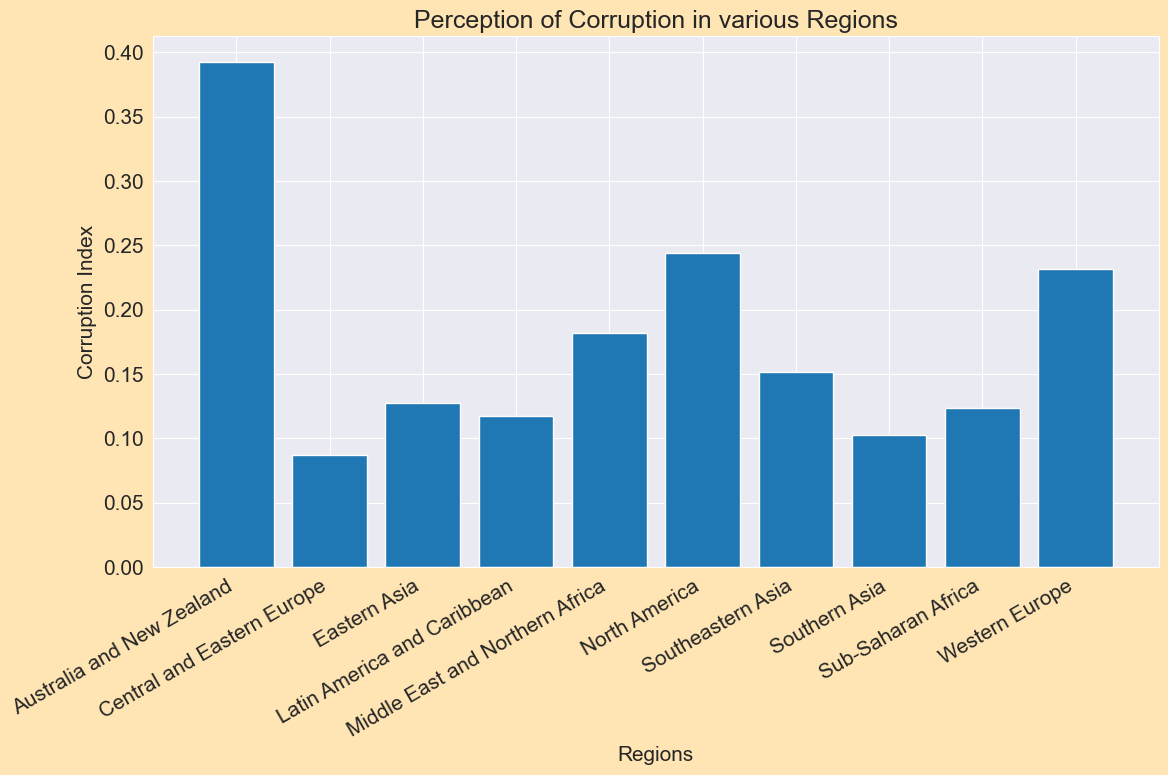

In [55]:
plt.figure(figsize=(12, 8))

plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions',fontsize =15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption['Trust (Government Corruption)'])

plt.tight_layout()
plt.show()


1.Compute the mean happiness score for each region and rank the regions from most happy to least happy

In [56]:
df_mean = df.groupby(['Region'])[['Happiness Score']].mean()

df_mean.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


2.Compute the number of countries in each region that have a happiness score above 6.0

In [57]:
happinest_6 = df.loc[(df['Happiness Score'])>6]

# Counting by region
happinest_6 = happinest_6.groupby(['Region'])[['Happiness Score']].count()

happinest_6.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Western Europe,16
Latin America and Caribbean,13
Middle East and Northern Africa,6
Australia and New Zealand,2
Central and Eastern Europe,2
North America,2
Southeastern Asia,2
Eastern Asia,1


3.Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [58]:
region_max_min = df.groupby(['Region'])[['Happiness Score']].max()-df.groupby(['Region'])[['Happiness Score']].min()

region_max_min.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Middle East and Northern Africa,4.272
Southeastern Asia,2.979
Western Europe,2.730
Latin America and Caribbean,2.708
Sub-Saharan Africa,2.638
Central and Eastern Europe,2.287
Southern Asia,1.678
Eastern Asia,1.424
North America,0.308


In [80]:
top_10= df.head(10)
bottom_10= df.tail(10)

# Bar plot of the Health (Life Expectancy) Score

Text(832.0858585858584, 0.5, 'Life Expectancy')

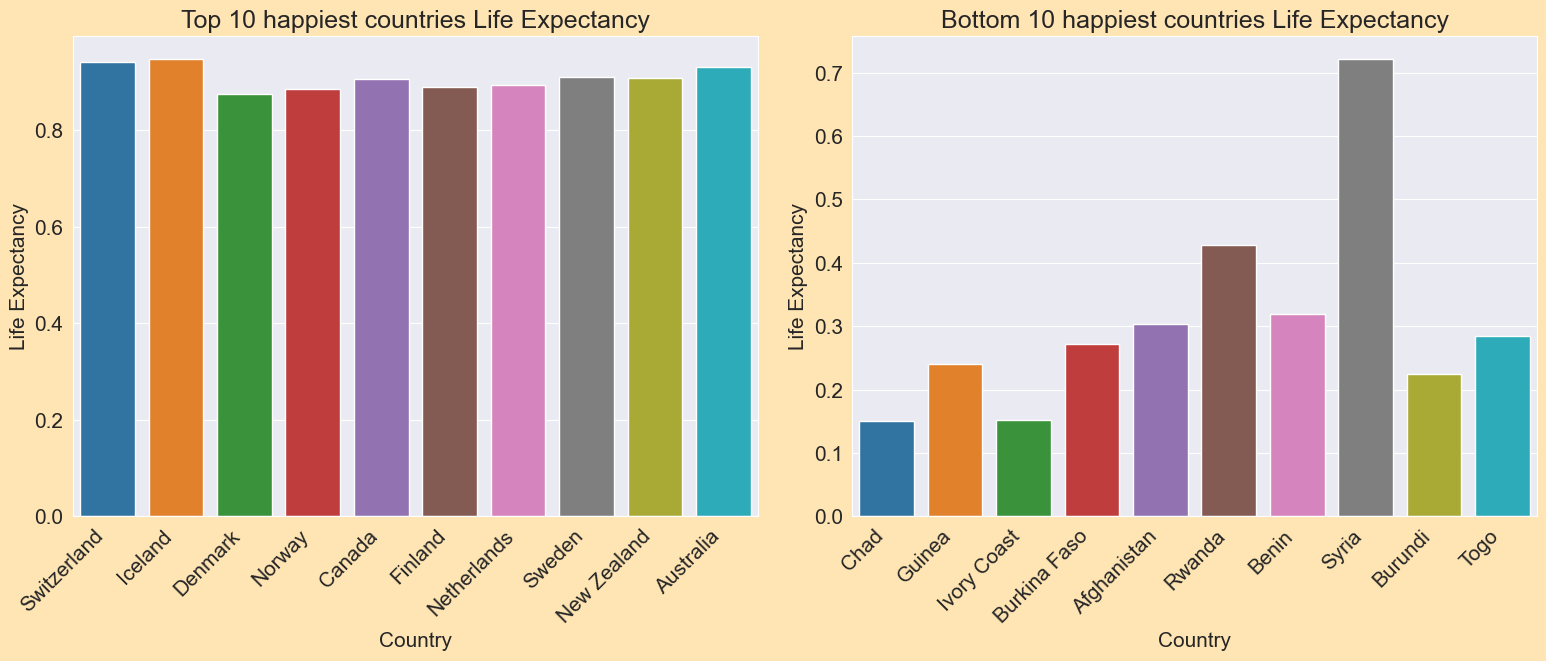

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.tight_layout(pad=2)
xlabels = top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10['Health (Life Expectancy)'], ax=axes[0]) 
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 happiest countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= bottom_10.Country, y=bottom_10['Health (Life Expectancy)'], ax=axes[1]) 
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life Expectancy')


# Plot between Freedom  and Happiness score

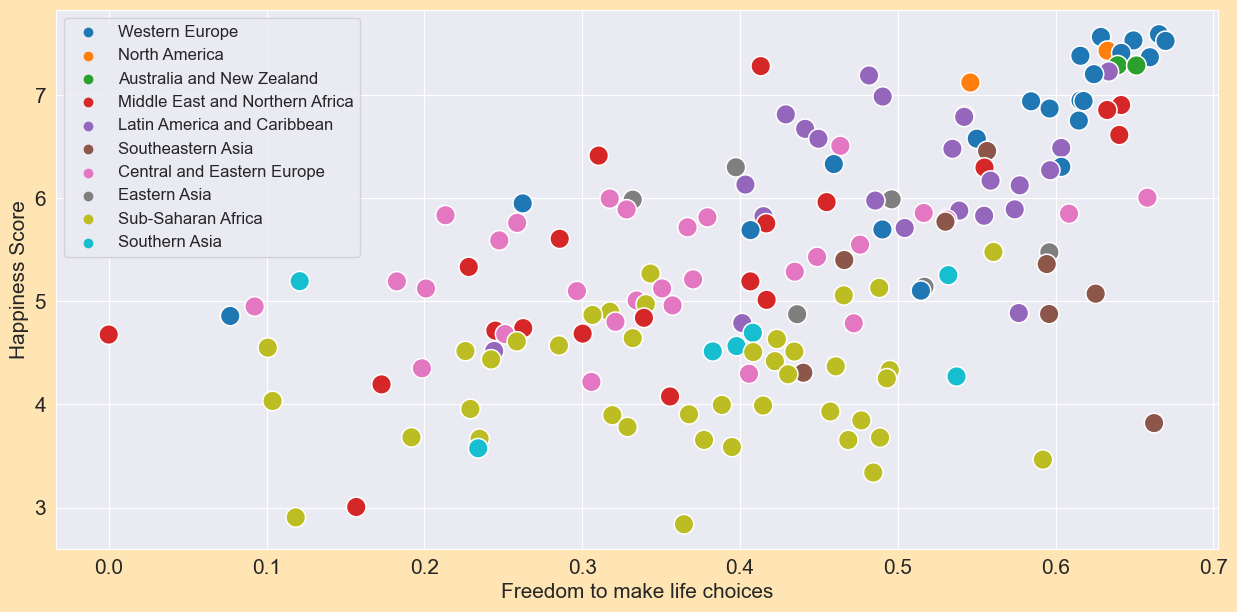

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

sns.scatterplot(x=df['Freedom'], y=df['Happiness Score'], hue=df['Region'], s=200)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

plt.show()


# Top_10 Most corruption country

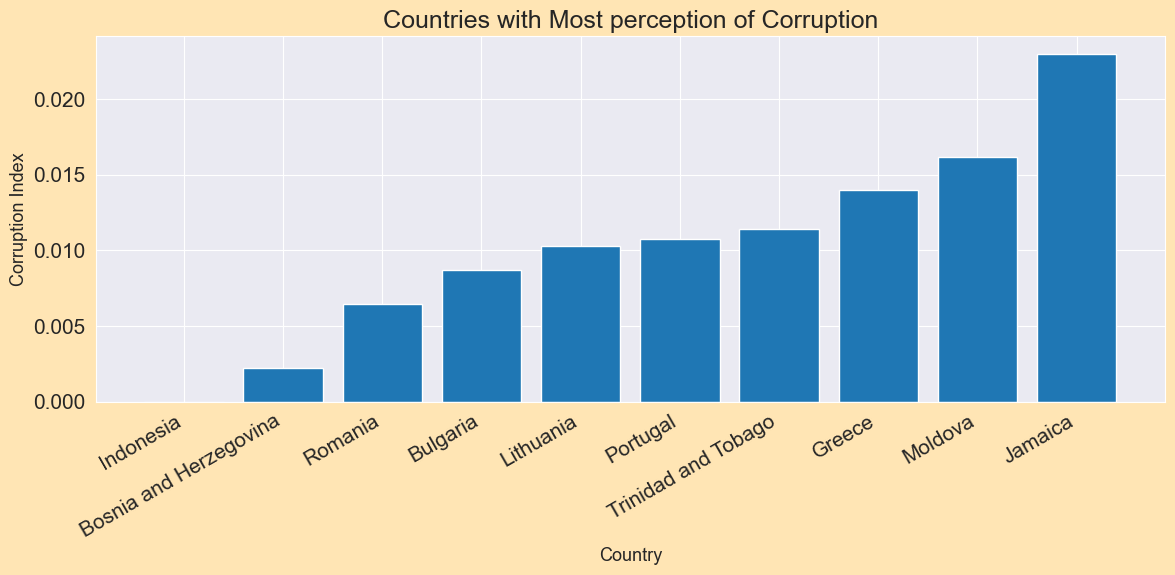

In [92]:
country = df.sort_values(by='Trust (Government Corruption)').head(10)

plt.figure(figsize=(12, 6))

plt.title('Countries with Most perception of Corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country['Country'], country['Trust (Government Corruption)'])

plt.tight_layout()
plt.show()


These are the least perception of corruption. Bosnia and Herzergoivna is least corruption index

# Top -10 Heighest perception of corruption country

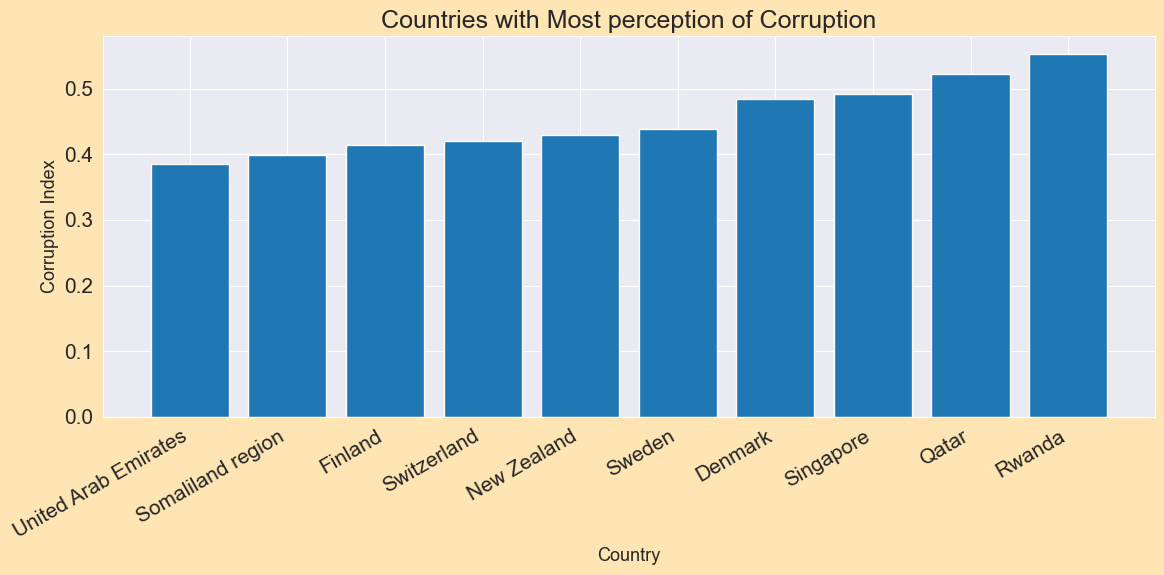

In [93]:
country = df.sort_values(by='Trust (Government Corruption)').tail(10)

plt.figure(figsize=(12, 6))

plt.title('Countries with Most perception of Corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country['Country'], country['Trust (Government Corruption)'])

plt.tight_layout()
plt.show()

# Corruption Vs Happiness

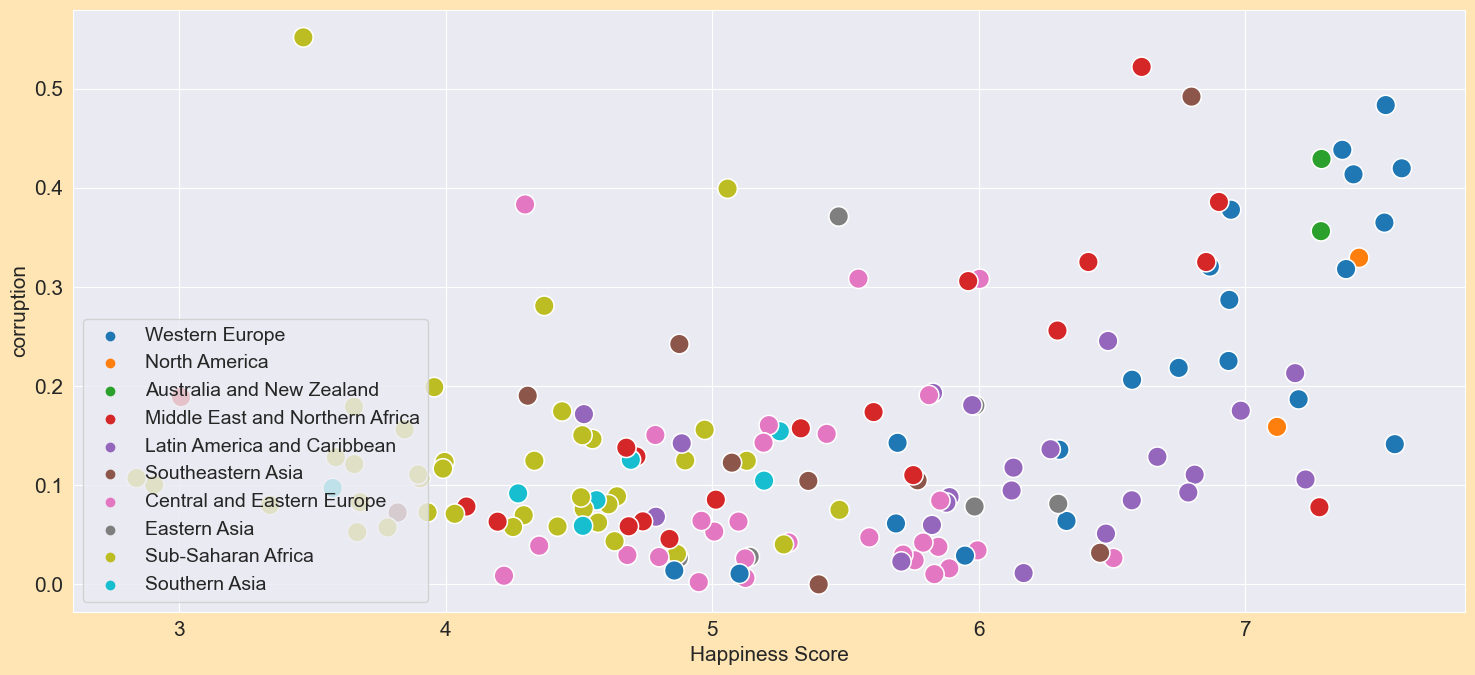

In [98]:
#Corruption Vs Happiness


plt.figure(figsize=(15, 7))

sns.scatterplot(x=df['Happiness Score'], y=df['Trust (Government Corruption)'], hue=df['Region'], s=200)
plt.legend(loc='lower left', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('corruption')

plt.tight_layout()
plt.show()



Here we can see different regions and X axes have happiness index ,y axes have Corruption index. we can see the general trend as per the scatter plot
Countries with greater happiness score have lower corruption index. These contries Western Europe highest happines score but lowest corruption.
Sub-Sahara Africa region is less happiness score and highest corruption in the countries.

In [94]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Bar plot of the Happiness Score

1) Horizontal bar plot of the Happiness Score of the top 10 countries

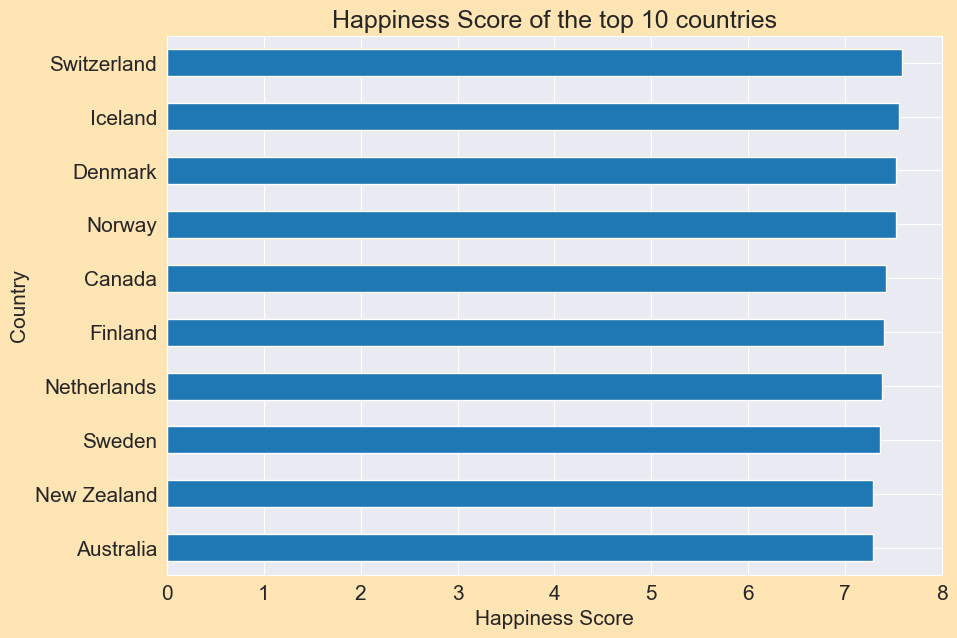

In [102]:
df_plot = df.set_index('Country')
df_plot = df_plot[0:10]['Happiness Score']

fig, ax = plt.subplots(figsize = (10,7))                               # Plot sizes
bar_plot = df_plot.plot.barh()                                       # Horizontal bar plot "barh"
bar_plot.set_title('Happiness Score of the top 10 countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()                                                # The biggest to smallest
plt.xlim(0,8)                                                          # change x-axis limits

plt.show()

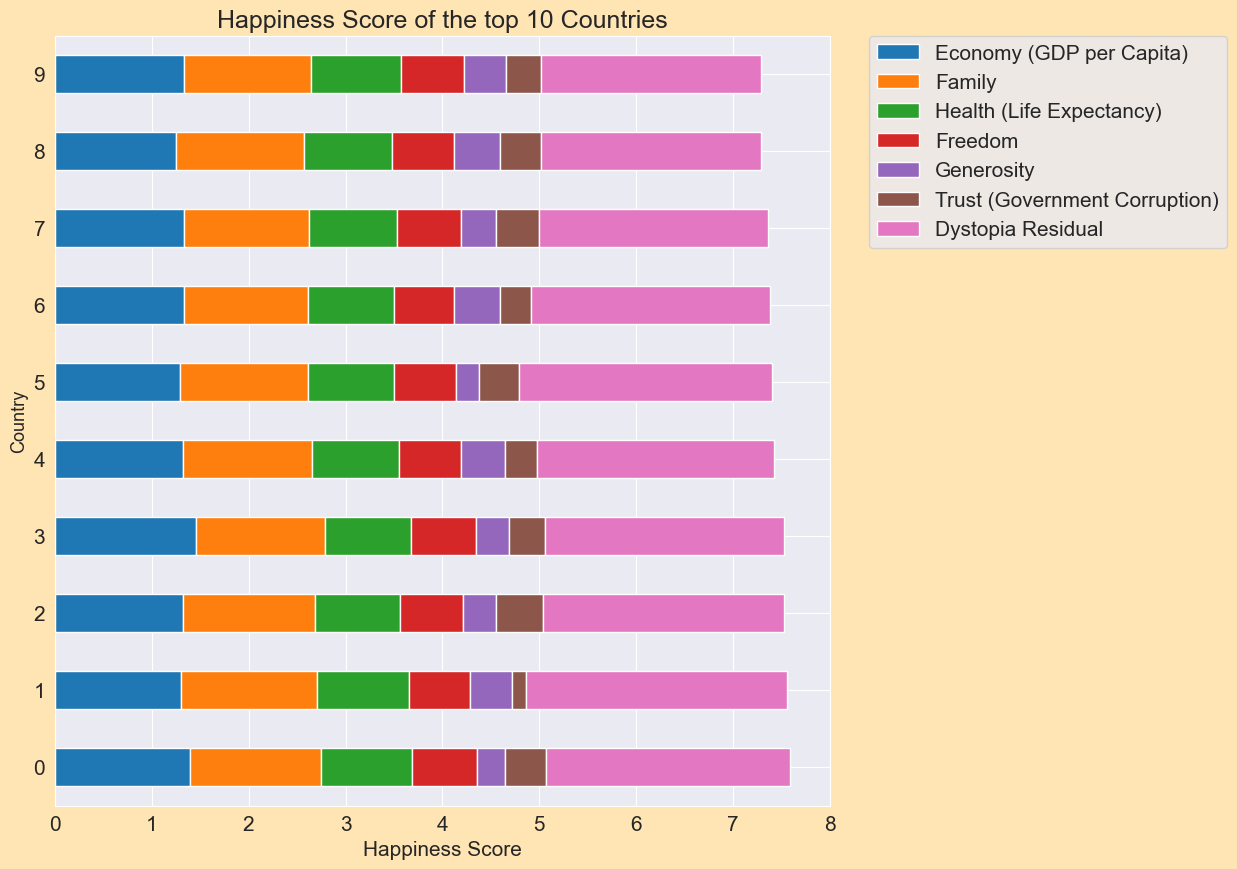

In [116]:
df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.ylabel('Country', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 1600x600 with 0 Axes>

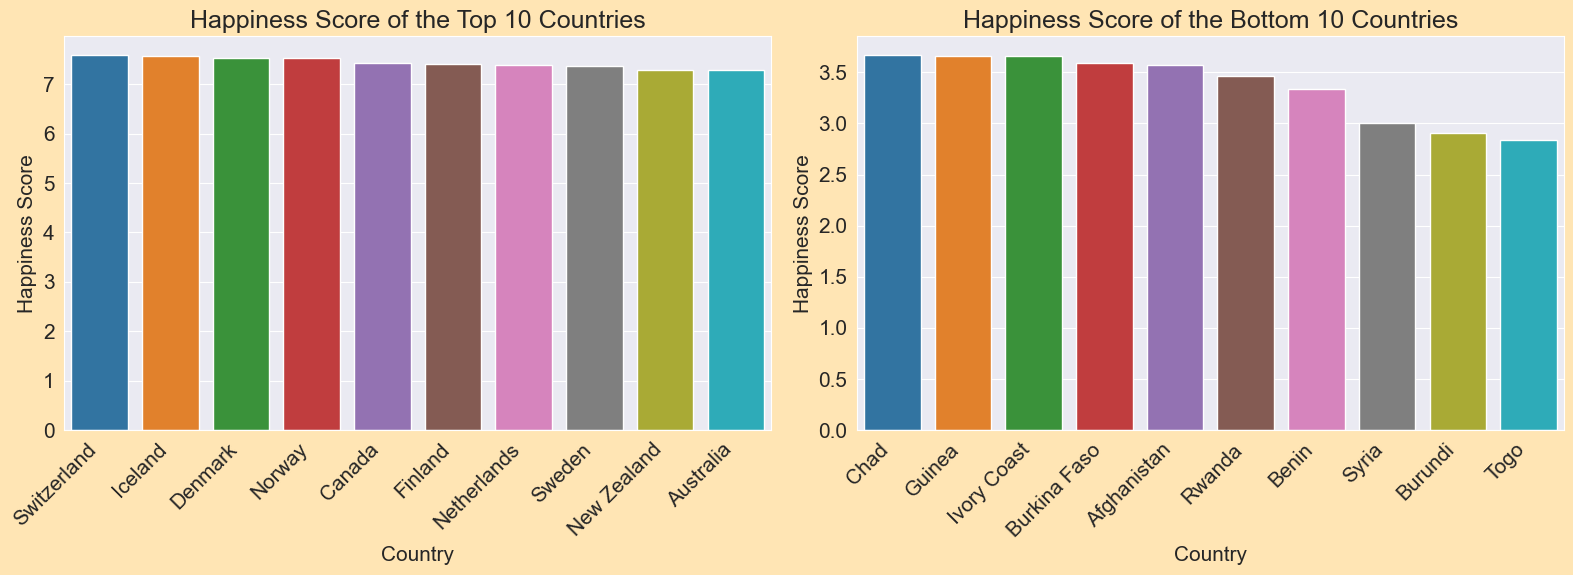

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported necessary libraries and have the DataFrames top_10 and bottom_10

plt.figure(figsize=(16, 6))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.tight_layout(pad=2)

# Plot for top 10 countries
xlabels_top = top_10.Country
sns.barplot(x=top_10.Country, y=top_10['Happiness Score'], ax=axes[0])
axes[0].set_title('Happiness Score of the Top 10 Countries')
axes[0].set_xticklabels(xlabels_top, rotation=45, ha='right')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Happiness Score')

# Plot for bottom 10 countries
xlabels_bottom = bottom_10.Country
sns.barplot(x=bottom_10.Country, y=bottom_10['Happiness Score'], ax=axes[1])
axes[1].set_title('Happiness Score of the Bottom 10 Countries')
axes[1].set_xticklabels(xlabels_bottom, rotation=45, ha='right')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Happiness Score')

plt.tight_layout()
plt.show()


<Figure size 1600x600 with 0 Axes>

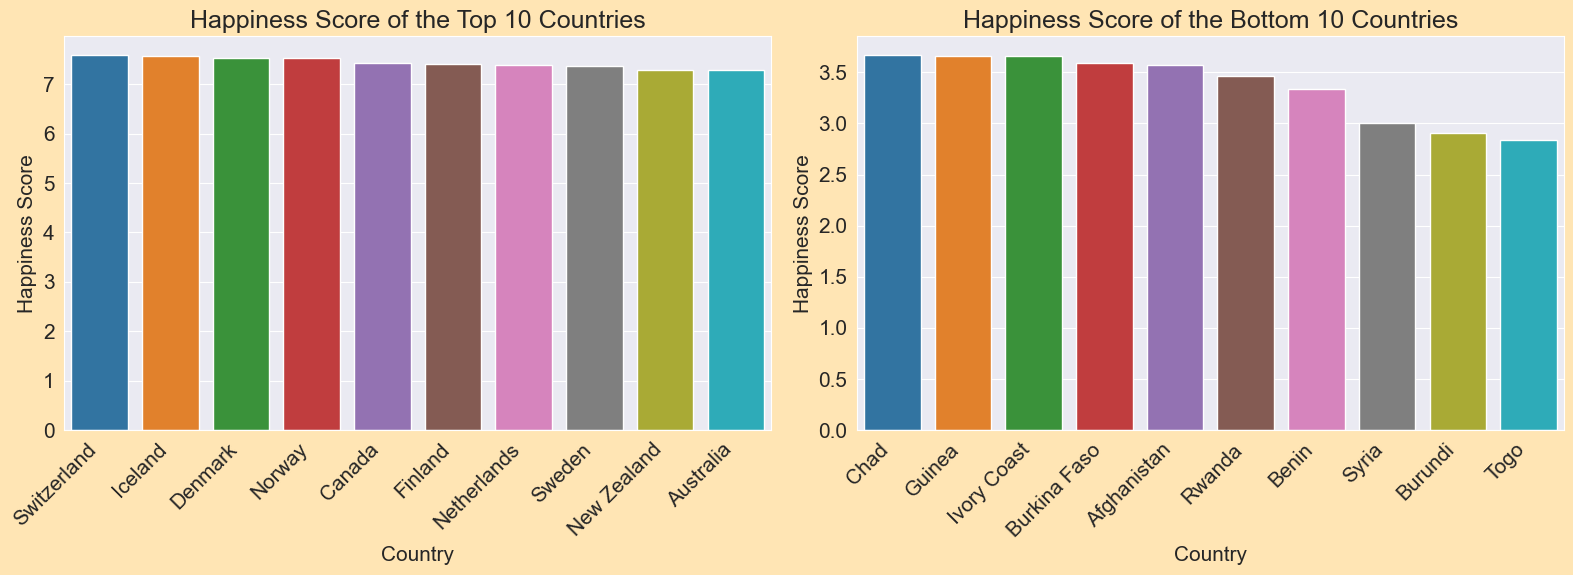

In [113]:
plt.figure(figsize=(16, 6))
df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']].head(10)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.tight_layout(pad=2)

# Plot for top 10 countries
xlabels_top = top_10.Country
sns.barplot(x=top_10.Country, y=top_10['Happiness Score'], ax=axes[0])
axes[0].set_title('Happiness Score of the Top 10 Countries')
axes[0].set_xticklabels(xlabels_top, rotation=45, ha='right')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Happiness Score')

# Plot for bottom 10 countries
xlabels_bottom = bottom_10.Country
sns.barplot(x=bottom_10.Country, y=bottom_10['Happiness Score'], ax=axes[1])
axes[1].set_title('Happiness Score of the Bottom 10 Countries')
axes[1].set_xticklabels(xlabels_bottom, rotation=45, ha='right')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Happiness Score')

plt.tight_layout()
plt.show()

In [118]:
df_Aus = df[df['Region'] == 'Australia and New Zealand']
df_NA = df[df['Region'] == 'North America']
df_WE = df[df['Region'] == 'Western Europe']
df_EA = df[df['Region'] == 'Eastern Asia']
df_ME = df[df['Region'] == 'Middle East and Northern Africa']
df_CE = df[df['Region'] == 'Central and Eastern Europe']
df_SNA = df[df['Region'] == 'Southeastern Asia']
df_SA = df[df['Region'] == 'Southern Asia']
df_SSA = df[df['Region'] == 'Sub-Saharan Africa']

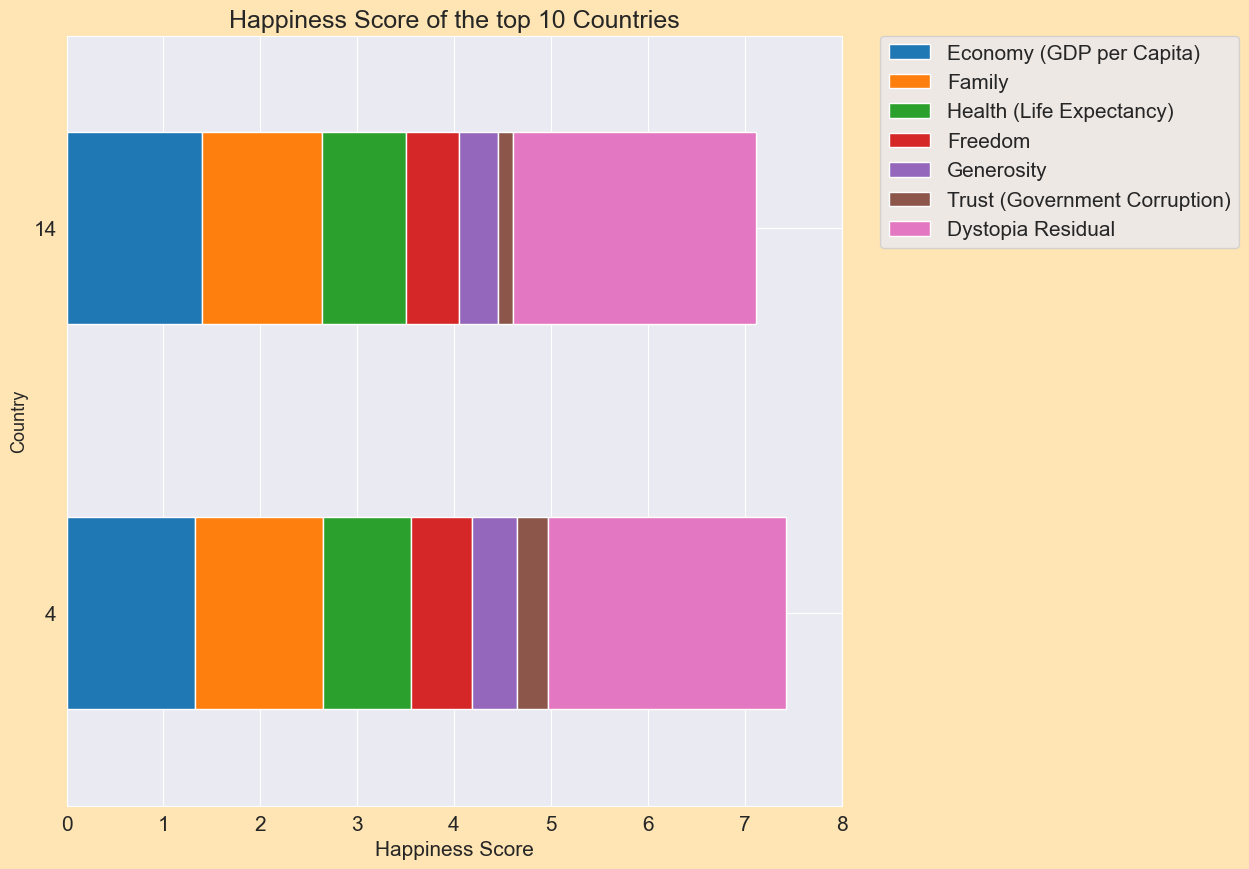

In [120]:
df_NA[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.ylabel('Country', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Pairwise Scatter plots

Pairwise Scatter plots
Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.

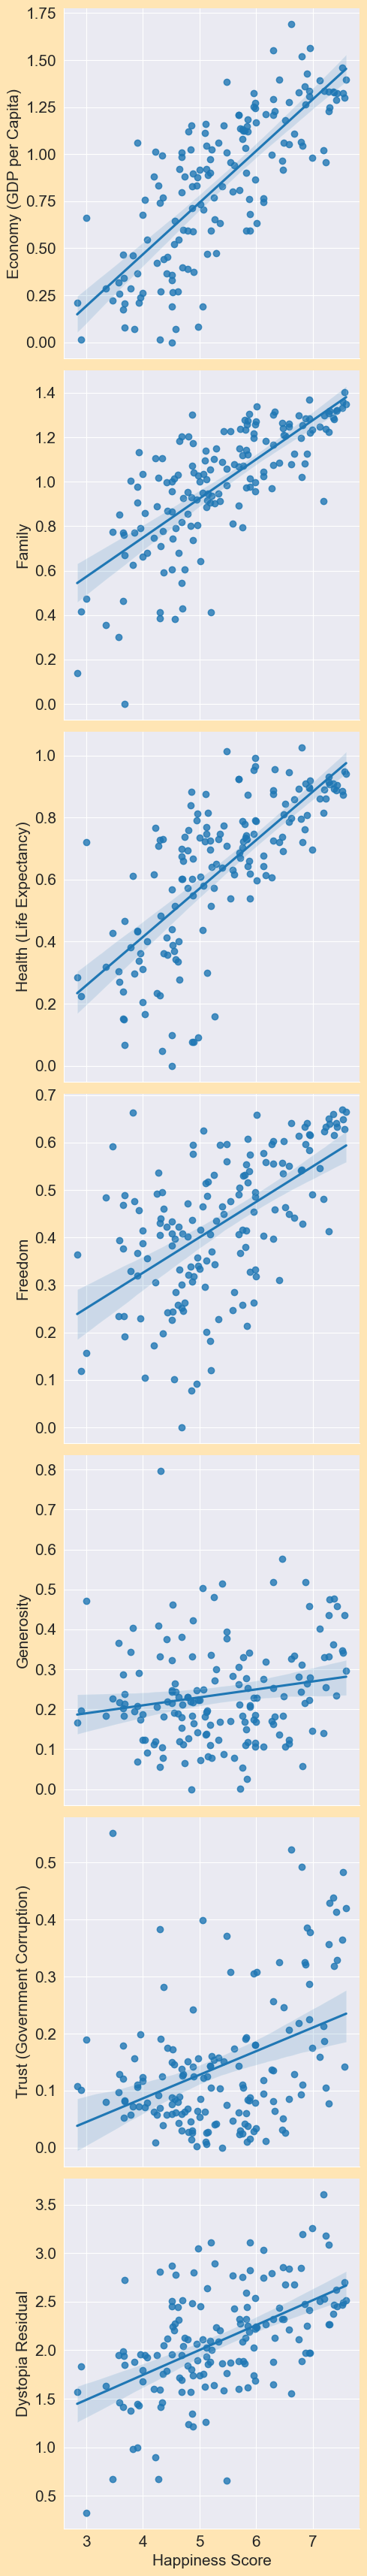

In [124]:

sns.pairplot(data=df, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual'])

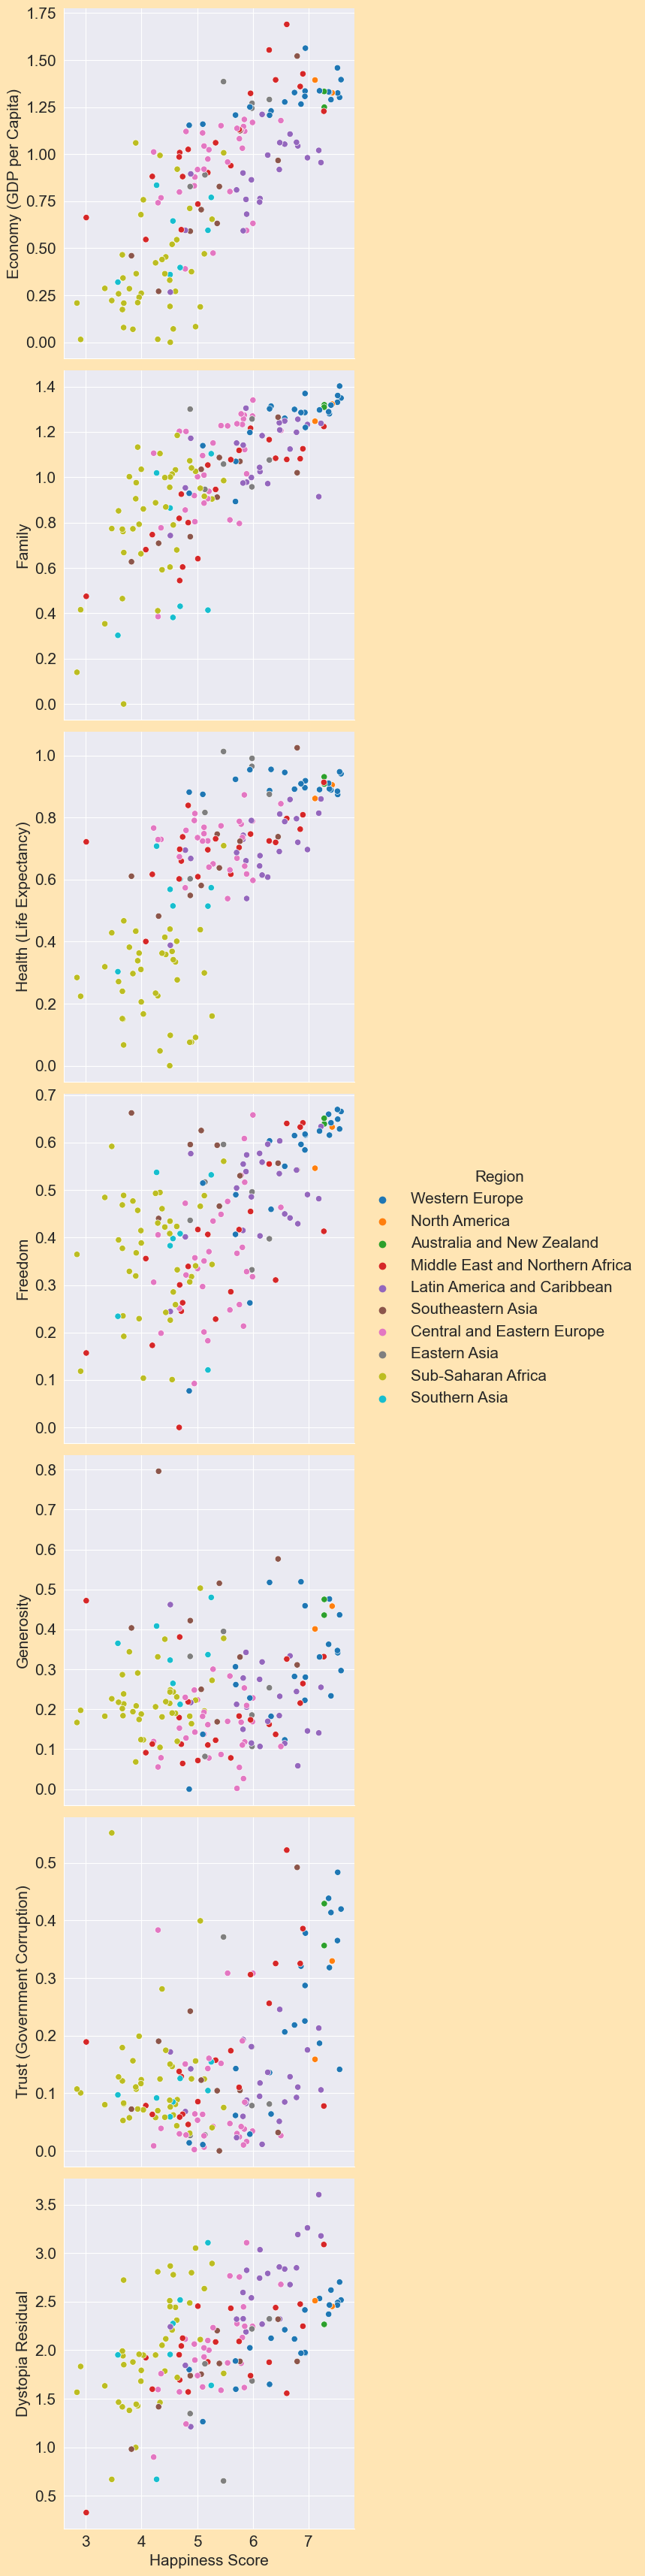

In [125]:
sns.pairplot(data=df, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual'])

# Correlation

Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [126]:
df.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [128]:
df.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Happiness Rank                   0.992105
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

If we ignore the Happiness Rank, Economy (GDP per Capita) seems to have the highest correlation with the Happiness Score.

In [129]:
df.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

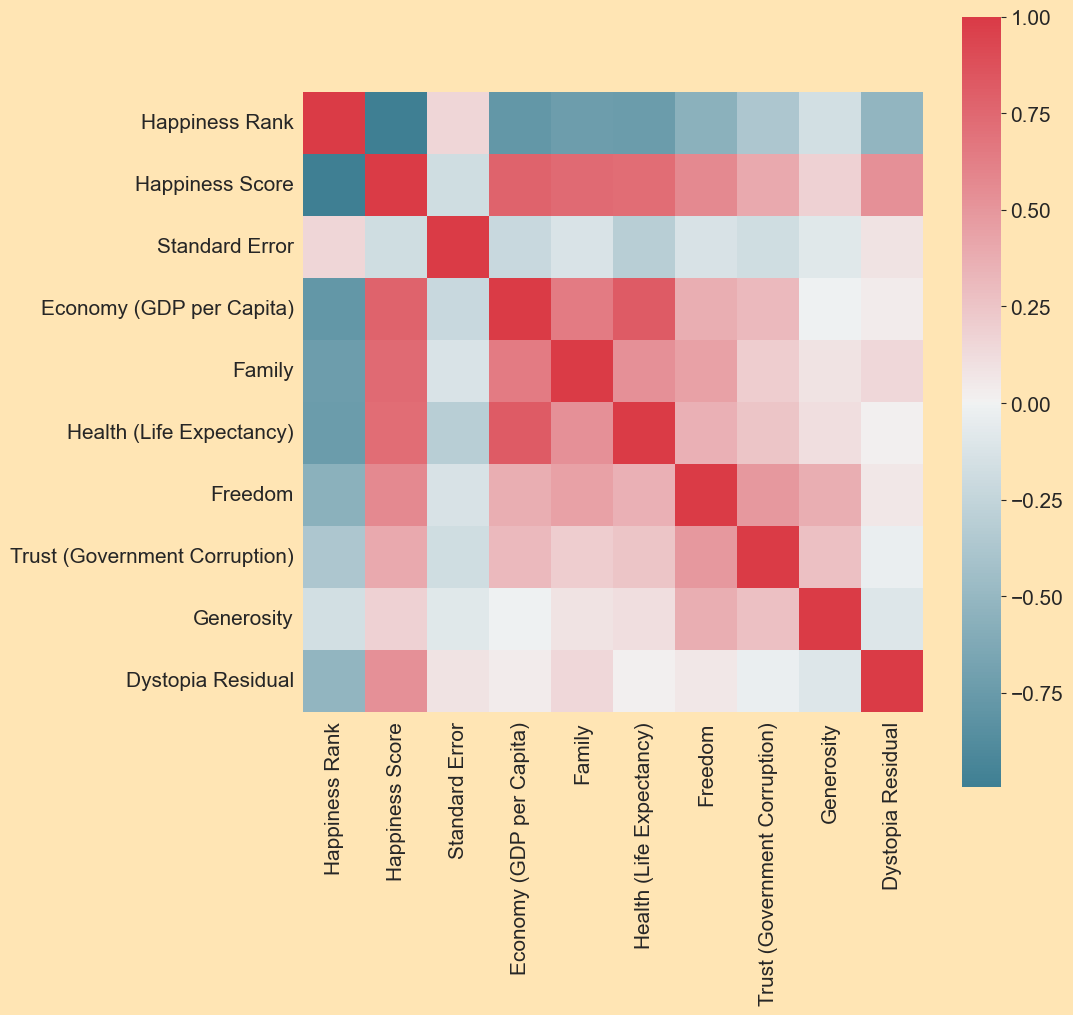

In [130]:
corr = df.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

# Probabilities

Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

In [131]:
df[df['Happiness Score'] > 6].shape[0]

44

In [134]:
df[(df['Happiness Score'] > 6)& (df['Region'] == 'Western Europe')].shape[0]

16

In [136]:
float(len(df[(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')]))/float(len(df[df['Happiness Score'] > 6]))

0.36363636363636365

In [137]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(df[(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')].shape[0]

)/float(df[df['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


The probability that a randomly selected country with Happiness scoee over 6.0 is form Western Europe is 36%

# Matrices

Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [138]:
df.shape

(158, 12)

In [154]:
Australia_NewZealand= []
North_America= []
Western_Europe= []
Latin_America_Caribbean= []
Eastern_Asia= []
Middle_East_Northern_Africa = []
Central_EasternEurope= []
Southeastern_Asia= []
Southern_Asia= []
Sub_Saharan_Africa= []

In [142]:
for x in df['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [143]:
for x in df['Region']:
    if x == 'Australia and New Zealand':
         Australia_NewZealand.append(1)
    else: Australia_NewZealand.append(0)

In [144]:
for x in df['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)

In [145]:
for x in df['Region']:
    if x == 'Latin America and Caribbean':
         Latin_America_Caribbean.append(1)
    else: Latin_America_Caribbean.append(0)

In [146]:
for x in df['Region']:
    if x == 'Eastern Asia':
        Eastern_Asia.append(1)
    else: Eastern_Asia.append(0)

In [147]:
for x in df['Region']:
    if x == 'Middle East and Northern Africa':
        Middle_East_Northern_Africa.append(1)
    else: Middle_East_Northern_Africa.append(0)

In [148]:
for x in df['Region']:
    if x == 'Central and Eastern Europe':
        Central_EasternEurope.append(1)
    else: Central_EasternEurope.append(0)

In [149]:
for x in df['Region']:
    if x == 'Southeastern Asia':
        Southeastern_Asia.append(1)
    else: Southeastern_Asia.append(0)

In [150]:
for x in df['Region']:
    if x == 'Southern_Asia':
        Southern_Asia.append(1)
    else: Southern_Asia.append(0)

In [151]:
for x in df['Region']:
    if x == 'Sub-Saharan Africa':
        Sub_Saharan_Africa.append(1)
    else: Sub_Saharan_Africa.append(0)

In [152]:
Matrix = pd.DataFrame(index=df.index)

In [155]:
Middle_East_Northern_Africa=[]

In [168]:
Matrix['Australia and New Zealand'] =Australia_NewZealand
Matrix['North America'] =North_America
Matrix['Western Europe'] =Western_Europe
Matrix['Latin America and Caribbean'] =Latin_America_Caribbean
Matrix['Eastern Asia'] =Eastern_Asia
Matrix['Middle East and Northern Africa'] =Middle_East_Northern_Africa
Matrix['Central and Eastern Europe'] =Central_EasternEurope
Matrix['Southeastern Asia'] =Southeastern_Asia
Matrix['Southern Asia'] = Southern_Asia
Matrix['Sub-Saharan Africa']= Sub_Saharan_Africa

ValueError: Length of values (0) does not match length of index (158)

In [169]:
Matrix.head(10)

,Australia and New Zealand,North America,Western Europe,Latin America and Caribbean,Eastern Asia
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [161]:
aarray_Matrix = Matrix.values


In [163]:
aarray_Matrix 

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0,

In [174]:
def region(a,b):
    """ This function creates a list of 1 and 0. 
        The Loop adds 1 if the country is in the region given in the parameter 'b'. 
        a = column with the regions in the dataframe """
    
    c = []
    for reg in a:        
        #return a
        if reg == b:
            c.append(1)
        else:
            c.append(0)
    return c 


W_Europe = region(df['Region'],'Western Europe')
E_Europe = region(df['Region'],'Eastern Europe')
L_America = region(df['Region'],'Latin America')
N_America = region(df['Region'],'North America')
Africa = region(df['Region'],'Africa')
Asia = region(df['Region'],'Asia-Pacific')



data_h = df.copy()
data_h = data_h.set_index('Country')      # Setting countries as index to create a new data frame with the same index

countries_region = pd.DataFrame(index=data_h.index)      # Creating Data Frame with index countries 



countries_region['Western_Europe'] = W_Europe
countries_region['Eastern_Europe'] = E_Europe
countries_region['Latin_America'] = L_America
countries_region['North_America'] = N_America
countries_region['Africa'] = Africa
countries_region['Asia'] = Asia

In [175]:
countries_region

,Western_Europe,Eastern_Europe,Latin_America,North_America,Africa,Asia
Country,,,,,,
Switzerland,1,0,0,0,0,0
Iceland,1,0,0,0,0,0
Denmark,1,0,0,0,0,0
Norway,1,0,0,0,0,0
Canada,0,0,0,1,0,0
...,...,...,...,...,...,...
Rwanda,0,0,0,0,0,0
Benin,0,0,0,0,0,0
Syria,0,0,0,0,0,0
